In [1]:
 # Importing neccessary packages
import numpy as np 
import pandas as pd
from imblearn.over_sampling import SMOTEN
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from sklearn.feature_selection import SelectKBest
from collections import Counter

# ignore warning
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as mtick # for showing percentage in it

In [2]:
data = pd.read_csv('Telco-Customer-Churn.csv')
data = data.drop(['customerID'] , axis=1)
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
# changing the Total charges type to int
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [6]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
#Removing missing values 
data.dropna(how = 'any', inplace = True)

In [8]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

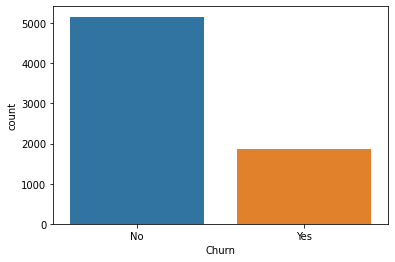

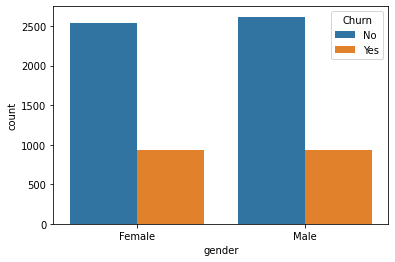

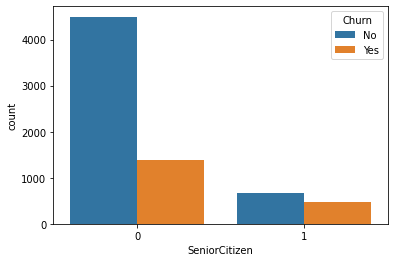

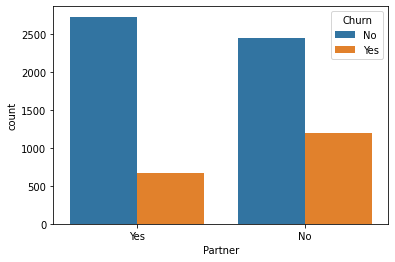

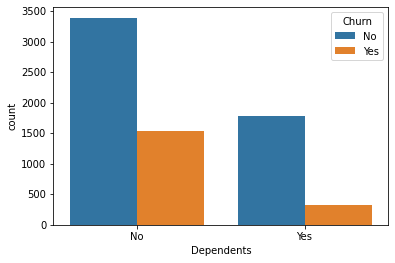

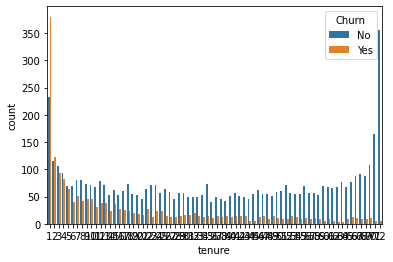

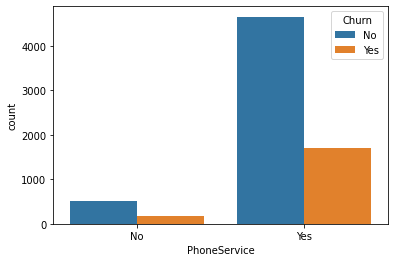

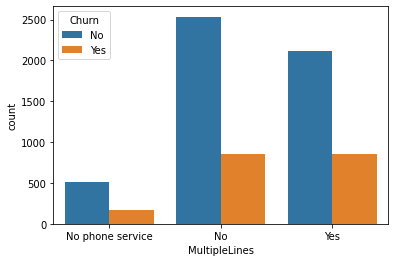

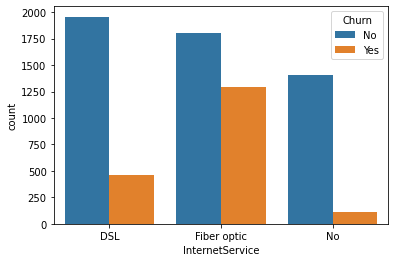

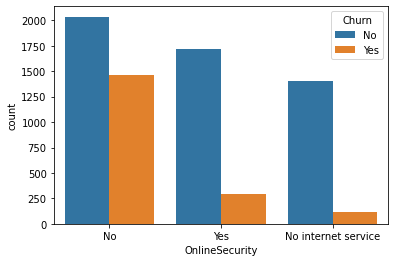

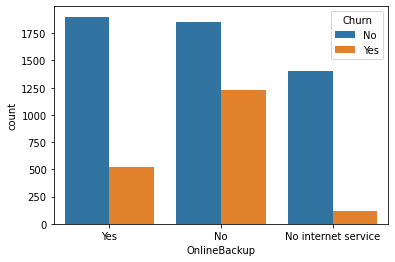

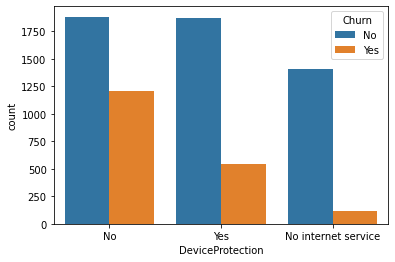

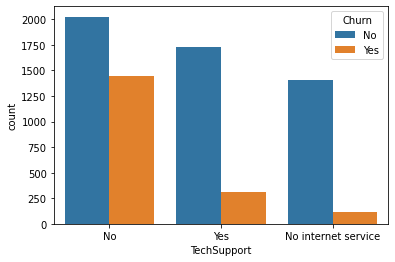

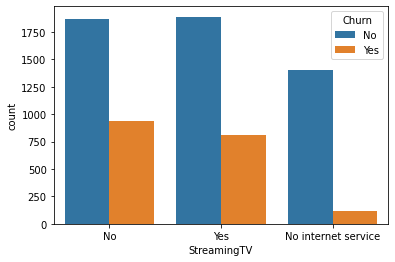

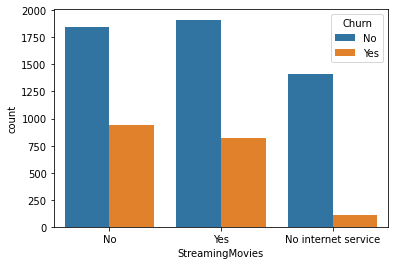

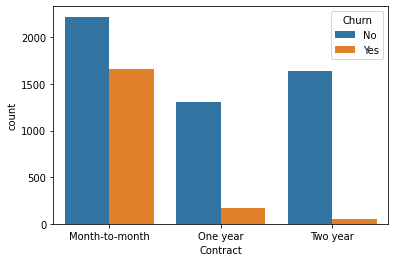

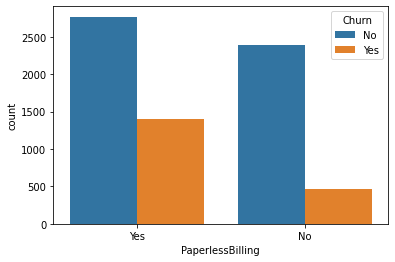

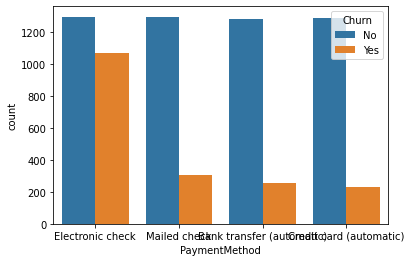

In [9]:
# EDA 

sns.countplot(x = 'Churn', data = data)
plt.show()
for i, predictor in enumerate(data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=data, x=predictor, hue='Churn')

In [10]:
data.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [11]:
# defining the categorical and numerical variables
categorical_columns = [col for col in data.columns if data[col].dtypes == 'O']
categorical_columns


['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [12]:
numerical_columns = [col for col in data.columns if data[col].dtypes != 'O']
numerical_columns

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [13]:
encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


<AxesSubplot:>

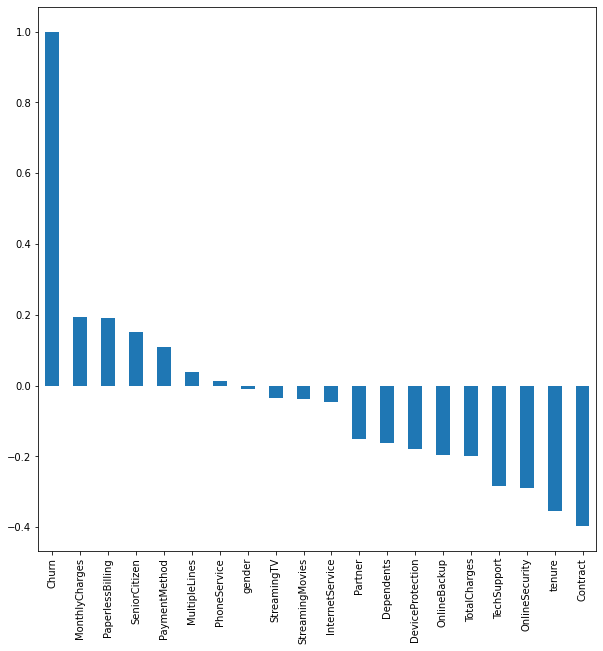

In [14]:
# getting the corelation of churn with other variables
plt.figure(figsize=(10,10))
data.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')


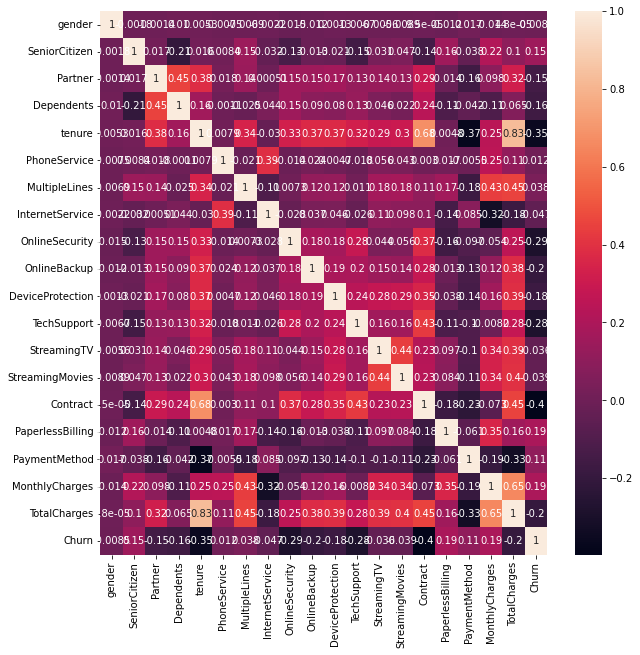

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [16]:
# splitting dataset into dependent and independent feature
x = data.drop(columns='Churn')
y = data['Churn']

In [17]:
# selects the feature which has more correlation
'''SelectKBest is a feature selection technique commonly used in machine learning. It aims to identify the k most informative features from a given dataset based on a statistical test.

How it works:

Statistical Test: SelectKBest applies a specified statistical test to each feature to measure its relevance to the target variable. Common tests include:

Chi-square test: For categorical features and categorical targets.
F-score: For numerical features and numerical targets.
Mutual information: For both categorical and numerical features.
Ranking: The features are ranked based on their test scores, with higher scores indicating greater relevance.

Selection: The top k features with the highest scores are selected.

Key Parameters:

k: The number of features to be selected.
score_func: The statistical test to be used.
Advantages:

Simple and efficient: SelectKBest is computationally efficient and easy to implement.
Interpretable: The selected features can provide insights into the underlying relationships in the data.
Versatile: Can be used with various machine learning algorithms.
Disadvantages:

Feature independence assumption: SelectKBest assumes that features are independent, which may not always be true in real-world data.
Sensitivity to k: The choice of k can significantly impact the performance of the model.
'''


sk = SelectKBest() #by default k=10
X = sk.fit_transform(x,y)


In [18]:
a=sk.get_support()
a

array([False, False, False,  True,  True, False, False, False,  True,
        True,  True,  True, False, False,  True,  True, False,  True,
        True])

According to the feature selection, we selects the 10 out of 21 features. these are the 10 features are selected [Dependents, tenure, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, Contract, PaperlessBilling, MonthlyCharges, TotalCharges]

From sklearn using feature selection modules importing the SelectKBest to select the important feature

In [19]:
# dropping the irrelevant features
data = data.drop(columns=x.columns[~a],axis=1)
data

,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,1,0,2,0,0,0,1,29.85,29.85,0
1,0,34,2,0,2,0,1,0,56.95,1889.50,0
2,0,2,2,2,0,0,0,1,53.85,108.15,1
3,0,45,2,0,2,2,1,0,42.30,1840.75,0
4,0,2,0,0,0,0,0,1,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...
7038,1,24,2,0,2,2,1,1,84.80,1990.50,0
7039,1,72,0,2,2,0,1,1,103.20,7362.90,0
7040,1,11,2,0,0,0,0,1,29.60,346.45,0
7041,0,4,0,0,0,0,0,1,74.40,306.60,1


In [20]:
# converting this to a csv file
data.to_csv('NEWTRANSFORMEDDATA.csv')

In [21]:
# dividing the data
x= data.drop(['Churn'] , axis=1)
y = data['Churn']
x

,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,TotalCharges
0,0,1,0,2,0,0,0,1,29.85,29.85
1,0,34,2,0,2,0,1,0,56.95,1889.50
2,0,2,2,2,0,0,0,1,53.85,108.15
3,0,45,2,0,2,2,1,0,42.30,1840.75
4,0,2,0,0,0,0,0,1,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...
7038,1,24,2,0,2,2,1,1,84.80,1990.50
7039,1,72,0,2,2,0,1,1,103.20,7362.90
7040,1,11,2,0,0,0,0,1,29.60,346.45
7041,0,4,0,0,0,0,0,1,74.40,306.60


In [22]:
import pandas as pd
from imblearn.over_sampling import SMOTEN
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

def compare_classification_models(X, y, param_grids={}):
    """Compares the accuracy of different classification models on a given dataset using grid search CV.

    Args:
        X: Feature matrix.
        y: Target labels.
        param_grids: A dictionary mapping model names to their corresponding parameter grids for grid search.

    Returns:
        A pandas DataFrame containing the model names, best parameters, and their accuracies.
    """

    models = {
        "Logistic Regression": LogisticRegression(),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Support Vector Machine": SVC(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Naive Bayes": GaussianNB(),
        'adabost': AdaBoostClassifier(),
        'gradientboost': GradientBoostingClassifier()
    }

    results = []
    for model_name, model in models.items():
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)
        st = SMOTEENN()
        X_train, y_train = st.fit_resample(X_train, y_train)
        

        # Create a GridSearchCV object with the specified parameters
        grid_search = GridSearchCV(model, param_grids.get(model_name, {}), cv=5)

        # Fit the model using grid search
        grid_search.fit(X_train, y_train)

        # Get the best model and its parameters
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_

        # Evaluate the best model on the test set
        y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        results.append((model_name, best_params, accuracy))

    results_df = pd.DataFrame(results, columns=["Model", "Best Parameters", "Accuracy"])
    results_df = results_df.sort_values(by="Accuracy", ascending=False)

    return results_df  

In [23]:
compare_classification_models(x, y)

,Model,Best Parameters,Accuracy
6,adabost,{},0.772566
7,gradientboost,{},0.765458
4,Random Forest,{},0.764037
0,Logistic Regression,{},0.754797
5,Naive Bayes,{},0.747690
3,Decision Tree,{},0.746269
1,K-Nearest Neighbors,{},0.714996
2,Support Vector Machine,{},0.700071


In [24]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=99)
y_train.value_counts()

# smoten
st = SMOTEENN()
x_train, y_train = st.fit_resample(x_train, y_train)
y_train.value_counts()

1    2471
0    2089
Name: Churn, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Assuming you have your feature matrix X and target labels y


# Define models and their corresponding parameter grids
models = {
    "Logistic Regression": (LogisticRegression(), {
        'C': [0.1, 1, 10]
    }),
    "K-Nearest Neighbors": (KNeighborsClassifier(), {
        #'n_neighbors': [3, 5, 7]
    }),
    "Support Vector Machine": (SVC(), {
        'C': [0.1, 1, 10],
        #'kernel': ['linear', 'rbf']
    }),
    "Decision Tree": (DecisionTreeClassifier(), {
        'max_depth': [None, 5, 10]
    }),
    "Random Forest": (RandomForestClassifier(), {
        #'n_estimators': [100, 200, 300],
        #'max_depth': [None, 5, 10]
    }),
    "Naive Bayes": (GaussianNB(), {})
}

# Iterate over models and perform grid search
results = []
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=3)
    grid_search.fit(x_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((model_name, accuracy))

# Create a DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Print results
print(results_df)

                    Model  Accuracy
4           Random Forest  0.771855
5             Naive Bayes  0.749112
0     Logistic Regression  0.748401
3           Decision Tree  0.734897
2  Support Vector Machine  0.709311
1     K-Nearest Neighbors  0.700782


In [26]:
import pickle

In [27]:
filename = 'Model.sav'
pickle.dump(best_model, open(filename,'wb'))

In [28]:
load_model = pickle.load(open(filename, 'rb'))


In [29]:
load_model.score(x_test, y_test)


0.7491115849324804